In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


# No Proper Explanation

In [2]:
                    # manipulation data

import pandas as pd
import numpy as np

                    #visualiation data

# 1) matplotlib & seaborn 

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 

                    #default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [3]:
import plotly.express as px

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
df = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')
df.head()
a="\n".join(['-'*120,'-'*120])
print(a)
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.describe().round(2)

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isna().count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [9]:
print('so we had ',df.shape[0],'Rows','and ',df.shape[1],'Columns')

so we had  1000 Rows and  8 Columns


In [10]:
print("\n".join(df.columns))

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


### **so we gonna change the name of some columns to make it more easy to use**

In [11]:
df=df.rename(columns={'race/ethnicity': 'race','parental level of education':'educ_level','test preparation course':'test'})
df

,gender,race,educ_level,lunch,test,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:ylabel='None'>

Text(0.5, 1.0, 'percent of data type pie_plot')

<AxesSubplot:>

Text(0.5, 1.0, 'type of data bar_plot')

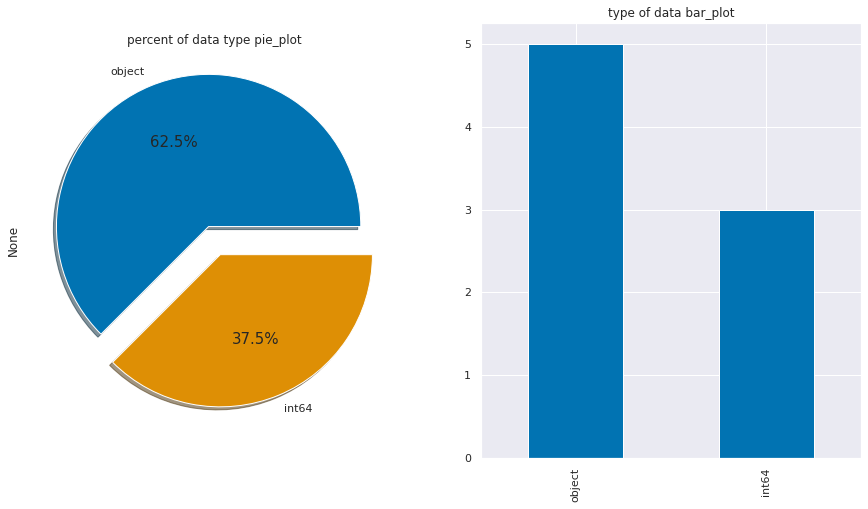

In [12]:
fig, axarr = plt.subplots(1,2,figsize=(15,8))

df.dtypes.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1],shadow=True,ax=axarr[0])
axarr[0].set_title('percent of data type pie_plot')

df.dtypes.value_counts().plot.bar(ax=axarr[1])
axarr[1].set_title('type of data bar_plot')

plt.show()

In [13]:
df.describe().round(2)

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


In [14]:
missing_value = df.isnull().sum()
missing_value
missing_percent = missing_value/df.shape[0]*100
missing_percent
dic = {
    'missing value':missing_value,
    'missing value %':missing_percent,
    'data type':df.dtypes
}

miss = pd.DataFrame(dic)
miss


gender           0
race             0
educ_level       0
lunch            0
test             0
math score       0
reading score    0
writing score    0
dtype: int64

gender           0.0
race             0.0
educ_level       0.0
lunch            0.0
test             0.0
math score       0.0
reading score    0.0
writing score    0.0
dtype: float64

,missing value,missing value %,data type
gender,0,0.0,object
race,0,0.0,object
educ_level,0,0.0,object
lunch,0,0.0,object
test,0,0.0,object
math score,0,0.0,int64
reading score,0,0.0,int64
writing score,0,0.0,int64


## like we see our data is super clean that facilate the manipulation of our model

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

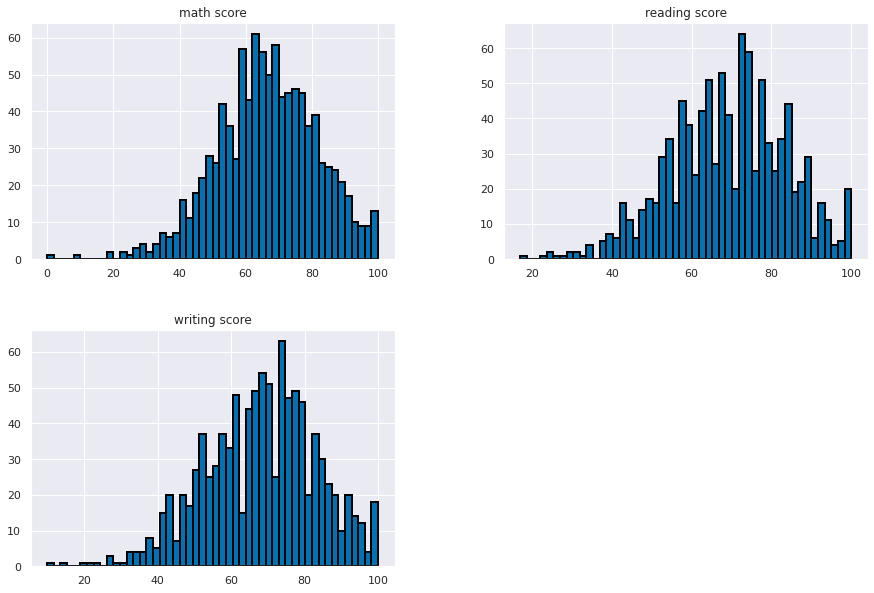

In [15]:
df.hist(figsize=(15,10),edgecolor='black',linewidth=2,bins=50)

Text(0.5, 0.98, 'subjects score')

<AxesSubplot:xlabel='math score', ylabel='Density'>

Text(0.5, 1.0, 'math score')

<AxesSubplot:xlabel='reading score', ylabel='Density'>

Text(0.5, 1.0, 'reading score')

<AxesSubplot:xlabel='writing score', ylabel='Density'>

Text(0.5, 1.0, 'writing score')

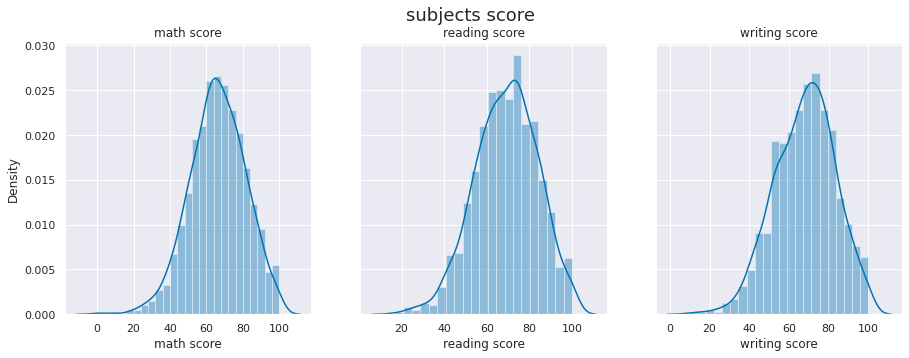

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('subjects score')

# math score
sns.distplot(df['math score'] , kde=True,ax=axes[0])
axes[0].set_title(df['math score'].name)

# reading score
sns.distplot(df['reading score'] , kde=True,ax=axes[1])
axes[1].set_title(df['reading score'].name)

# wrinting score
sns.distplot(df['writing score'] , kde=True,ax=axes[2])
axes[2].set_title(df['writing score'].name)

# A- Gender

<AxesSubplot:ylabel='gender'>

Text(0.5, 1.0, 'percent of Gender count pie_plot ')

<AxesSubplot:>

Text(0.5, 1.0, 'count of Gender bar_plot')

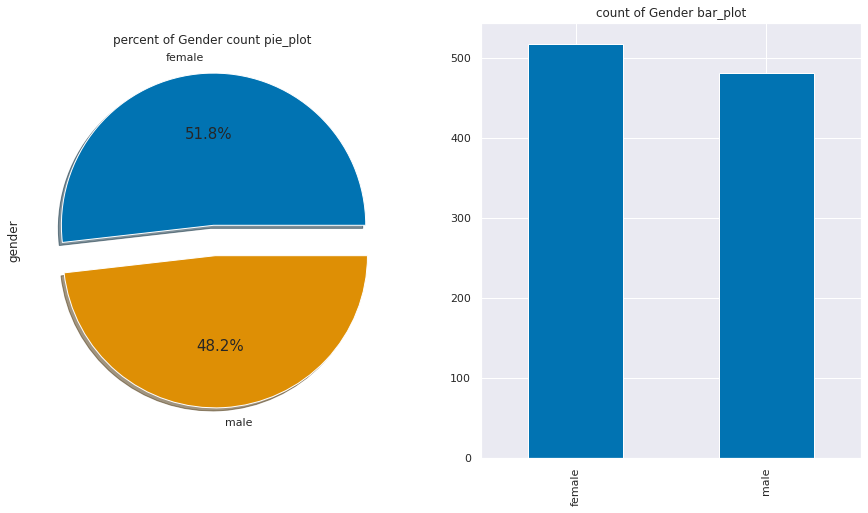

In [17]:
fig, axarr = plt.subplots(1,2,figsize=(15,8))

df.gender.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1],shadow=True,ax=axarr[0])
axarr[0].set_title('percent of Gender count pie_plot ')

df.gender.value_counts().plot.bar(ax=axarr[1])
axarr[1].set_title('count of Gender bar_plot')

plt.show()

as we can see the number of fame are more then males with a small different

# B- race

<AxesSubplot:ylabel='race'>

Text(0.5, 1.0, 'percent of race count')

<AxesSubplot:>

Text(0.5, 1.0, 'count of race type')

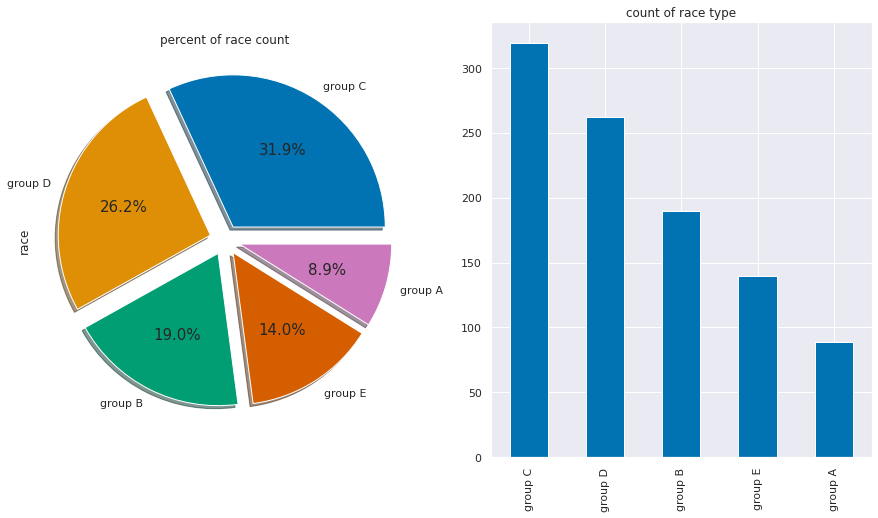

In [18]:
fig, axarr = plt.subplots(1,2,figsize=(15,8))

df.race.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1],shadow=True,ax=axarr[0])
axarr[0].set_title('percent of race count')

df.race.value_counts().plot.bar(ax=axarr[1])
axarr[1].set_title('count of race type')

plt.show()

Text(0.5, 1.0, 'gender by group')

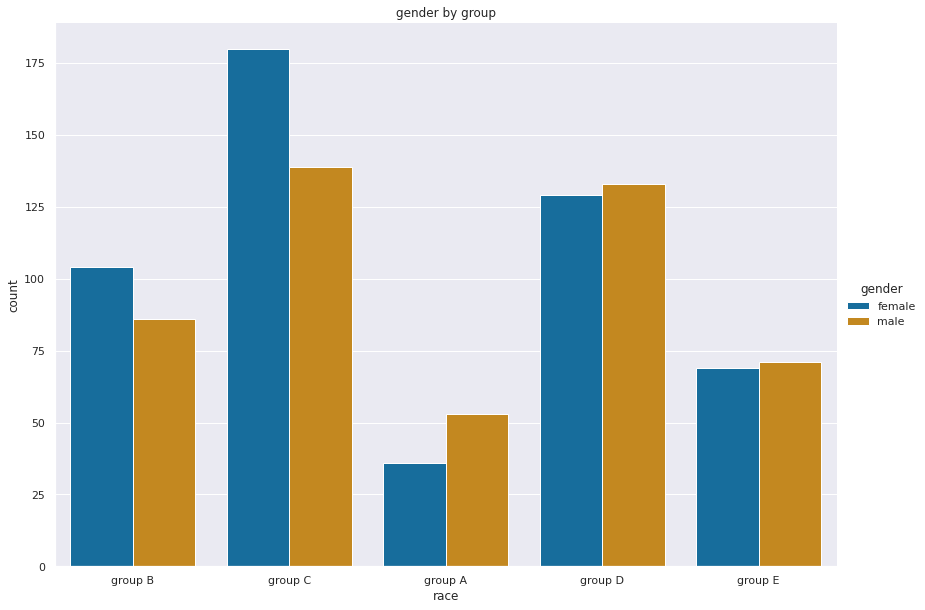

In [19]:
sns.catplot(x='race',hue='gender',data=df,kind='count', height=8.27, aspect=11.7/8.27)
plt.title('gender by group')
plt.show()

# from this plot we can explote some notes :

* famale are from group B / C more then males
* male are from group A / D more then famales
* male and famales are probably the same in group E

# C- education level

<AxesSubplot:ylabel='educ_level'>

Text(0.5, 1.0, 'percent of race count')

<AxesSubplot:>

Text(0.5, 1.0, 'count of race type')

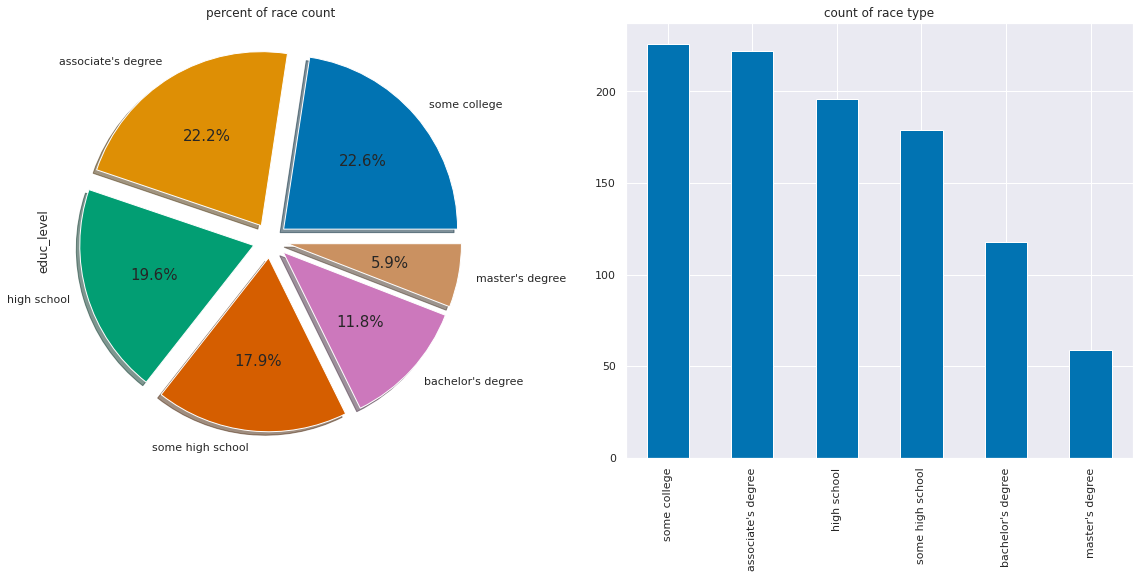

In [20]:
fig, axarr = plt.subplots(1,2,figsize=(20,8))

df.educ_level.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1],shadow=True,ax=axarr[0])
axarr[0].set_title('percent of race count')

df.educ_level.value_counts().plot.bar(ax=axarr[1])
axarr[1].set_title('count of race type')

plt.show()

# gender vs education lavel

Text(0.5, 1.0, 'gender by education level')

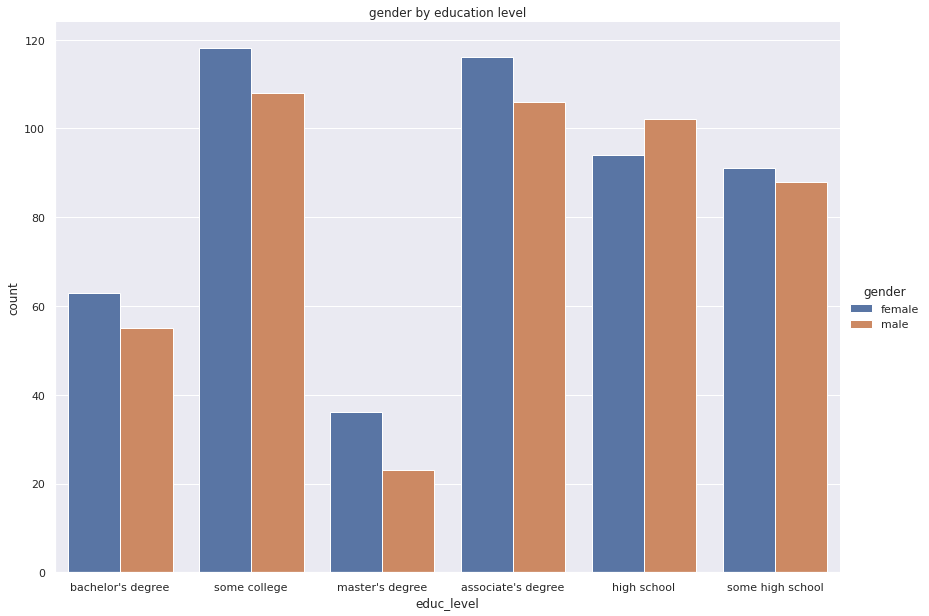

In [21]:
sns.set_theme(style="darkgrid")
sns.catplot(x='educ_level',hue='gender',data=df,kind='count', height=8.27, aspect=11.7/8.27)
plt.title('gender by education level')
plt.show()

Text(0.5, 1.0, 'race by education level')

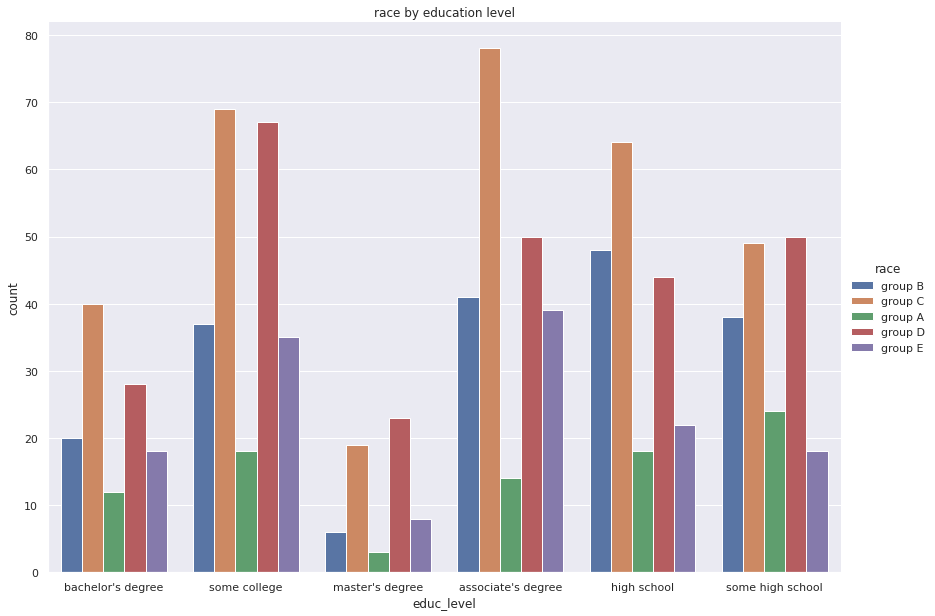

In [22]:
sns.catplot(x='educ_level',hue='race',data=df,kind='count', height=8.27, aspect=11.7/8.27)
plt.title('race by education level')
plt.show()

<AxesSubplot:ylabel='lunch'>

Text(0.5, 1.0, 'lunch')

<AxesSubplot:>

Text(0.5, 1.0, 'lunch')

<AxesSubplot:ylabel='test'>

Text(0.5, 1.0, 'test')

<AxesSubplot:>

Text(0.5, 1.0, 'test')

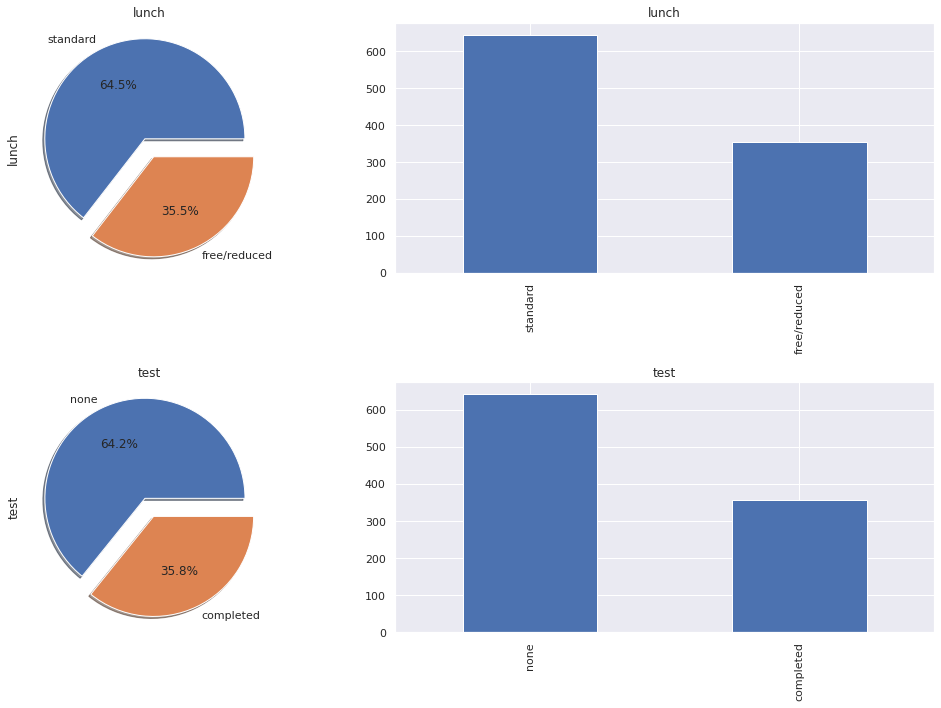

In [23]:
fig, axarr = plt.subplots(2,2,figsize=(15,10))

df.lunch.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1],shadow=True,ax=axarr[0][0])
axarr[0][0].set_title(df.lunch.name)

df.lunch.value_counts().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title(df.lunch.name)

df.test.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1],shadow=True,ax=axarr[1][0])
axarr[1][0].set_title(df.test.name)

df.test.value_counts().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title(df.test.name)

plt.tight_layout()

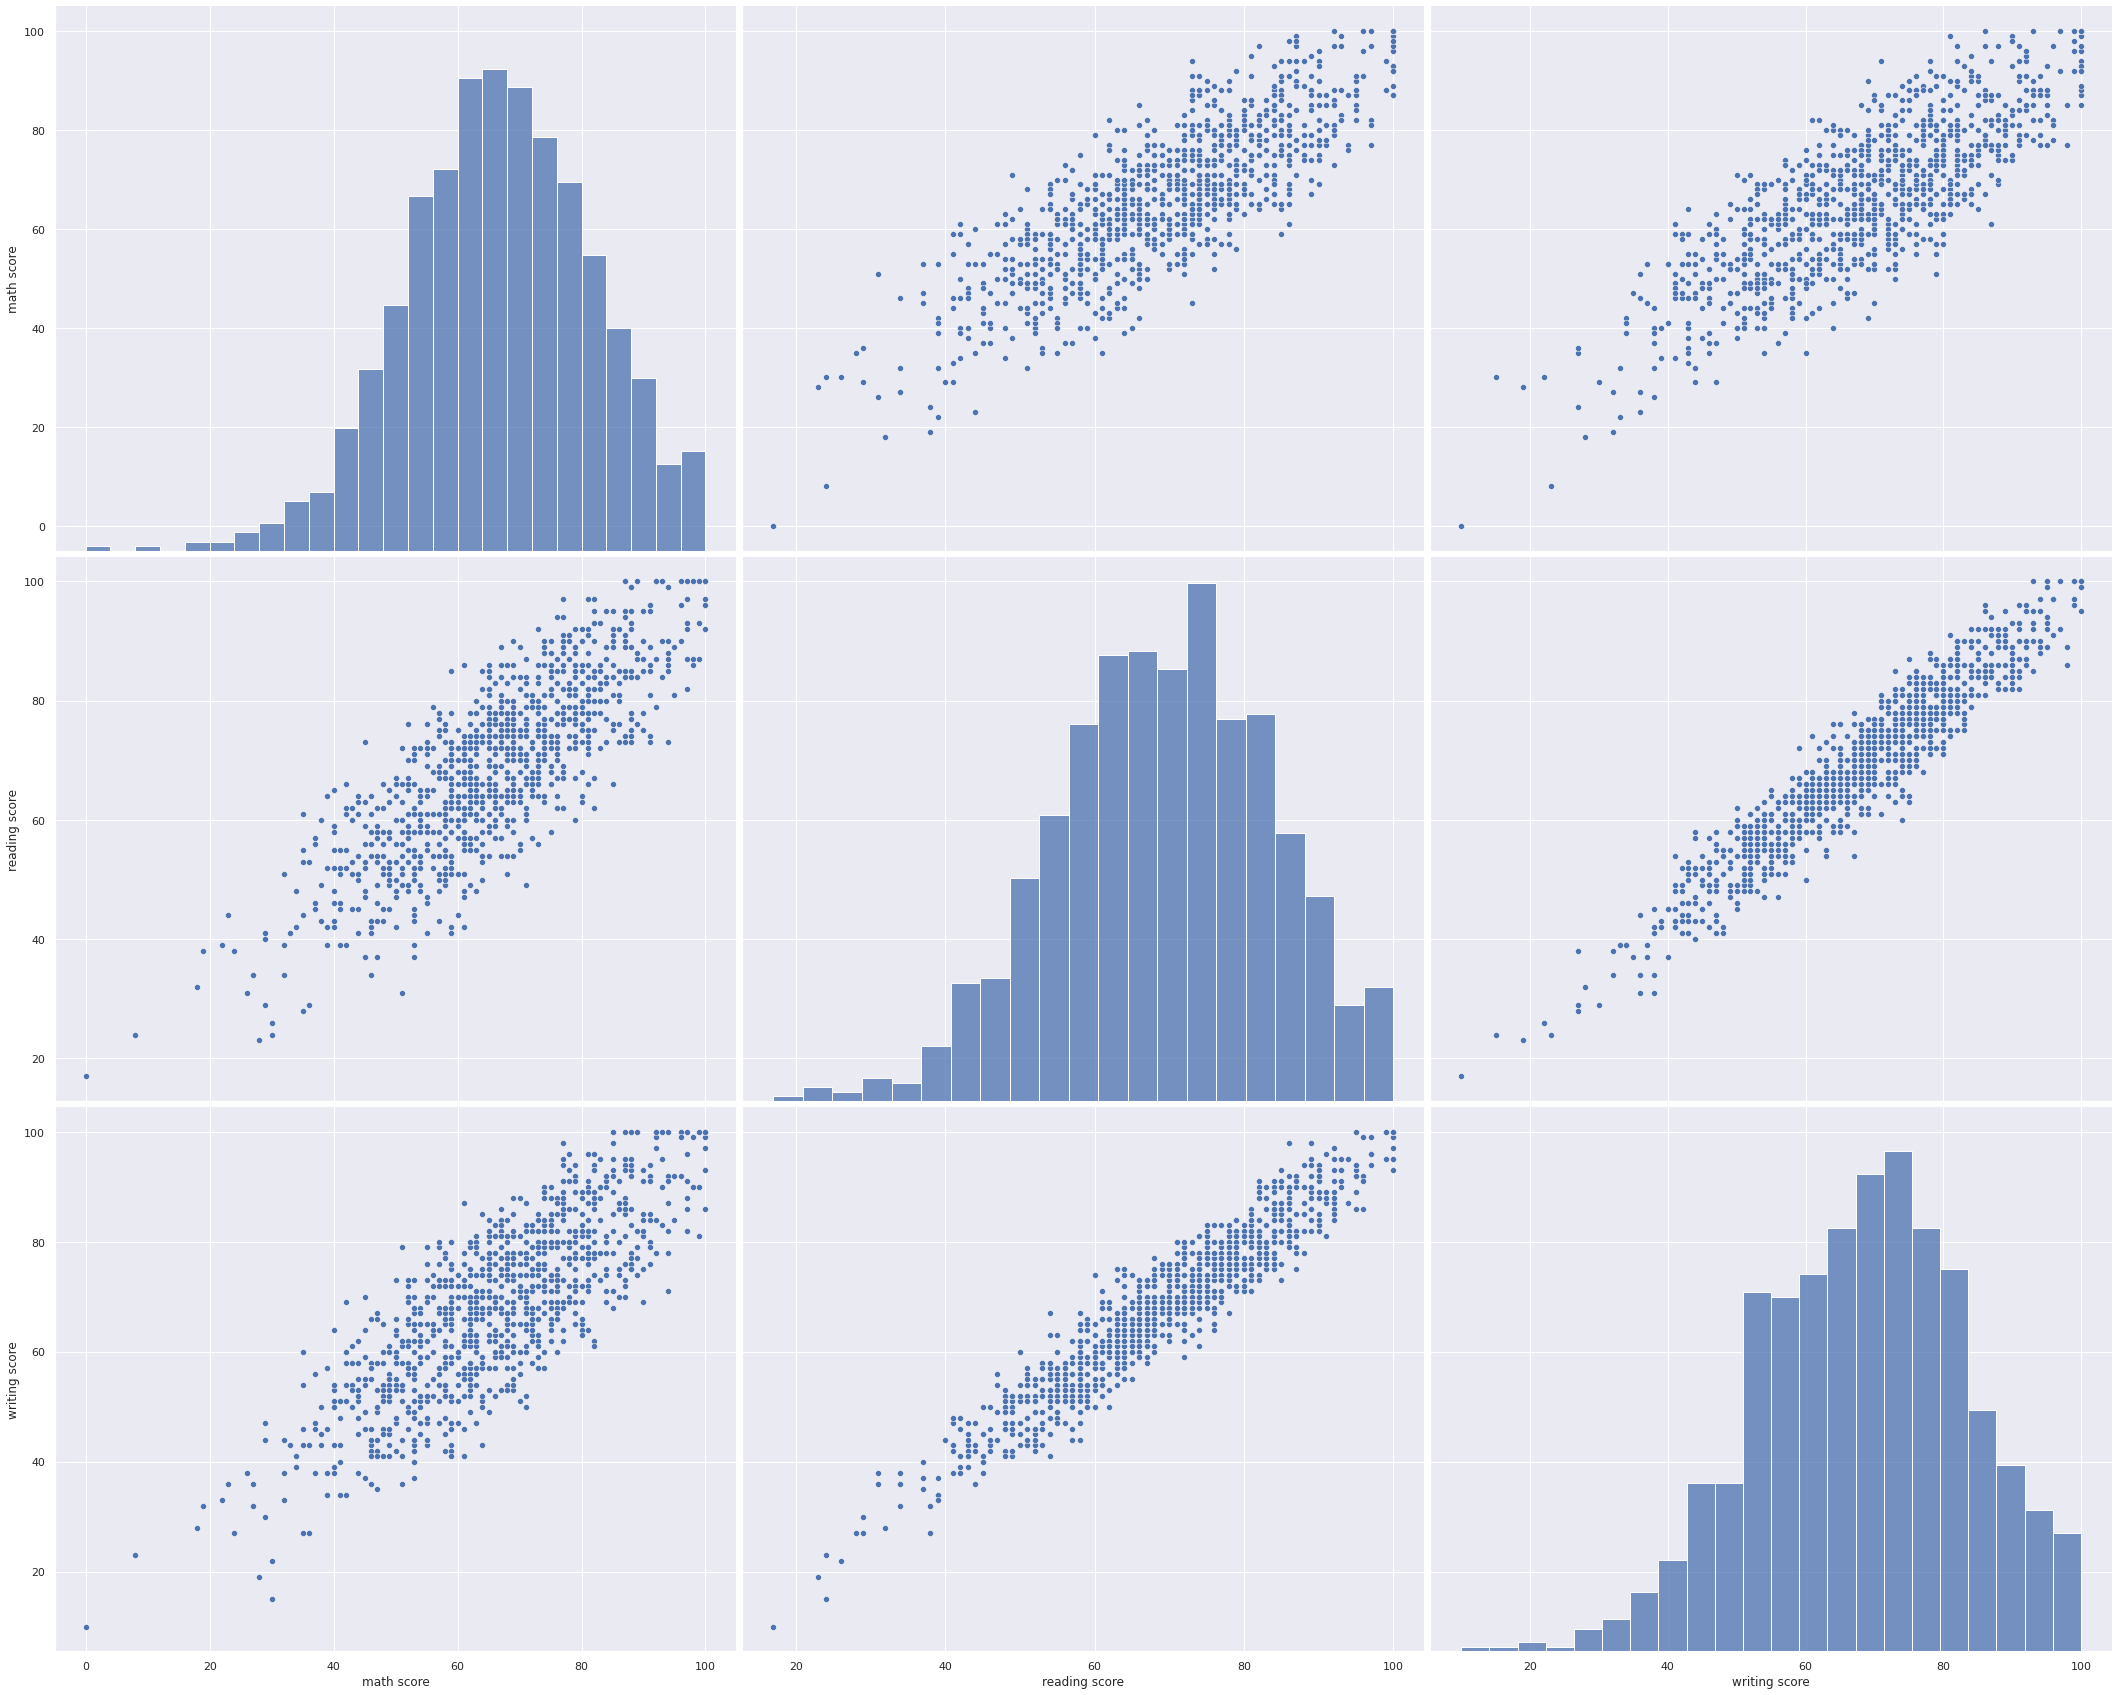

In [24]:
df_scores = df.iloc[:,5:8]
sns.pairplot(df_scores, height=8, aspect=10/8)
plt.show()

In [27]:
px.violin(df,x='gender', y='math score',box=True,color='gender')
px.violin(df,x='gender', y='reading score',box=True,color='gender')
px.violin(df,x='gender', y='writing score',box=True,color='gender')

In [28]:
px.violin(df,x='gender', y='math score',color='gender')
px.violin(df,x='gender', y='reading score',color='gender')
px.violin(df,x='gender', y='writing score',color='gender')

In [29]:
px.box(df,x='gender', y='math score',color='gender')
px.box(df,x='gender', y='reading score',color='gender')
px.box(df,x='gender', y='writing score',color='gender')

In [33]:
groupby_gender=df.groupby(['gender']).describe()
groupby_gender[['math score','reading score','writing score']]

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

In [36]:
pd.set_option("max_columns",30)

In [49]:
from termcolor import colored

print(colored('\nmath score'.upper(),'green'))
groupby_gender['math score'].round(2)

print(colored('\nreading score'.upper(),'green'))
groupby_gender['reading score'].round(2)

print(colored('\nwriting score'.upper(),'green'))
groupby_gender['writing score'].round(2)


MATH SCORE


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.63,15.49,0.0,54.0,65.0,74.0,100.0
male,482.0,68.73,14.36,27.0,59.0,69.0,79.0,100.0



READING SCORE


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.61,14.38,17.0,63.25,73.0,83.0,100.0
male,482.0,65.47,13.93,23.0,56.00,66.0,75.0,100.0



WRITING SCORE


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.47,14.84,10.0,64.0,74.0,82.00,100.0
male,482.0,63.31,14.11,15.0,53.0,64.0,73.75,100.0


# on the first look in this plot we can conclude that :
1. the mean , 75% and 25% of reading and writing scores for female are more higher then males
1. but mean , 75% and 25% of math score for male are higher the females

### **➛** we can cocnclude that male outperform in scientific subject then famel who had better in literary material

In [55]:
px.scatter(df,x='gender',y='math score',facet_col='gender', width=800, height=400)

In [ ]:
help(px.scatter)

Text(0.5, 1.0, 'difference between math score by gender')

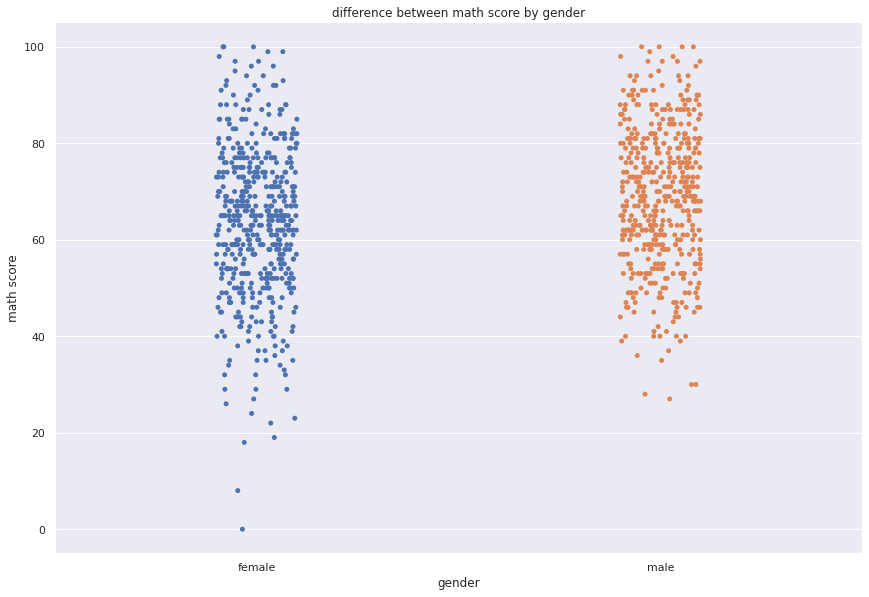

In [57]:
sns.catplot(x='gender',y='math score',data=df,height=8,aspect=15/10)
plt.title('difference between math score by gender')
plt.show()

In [58]:
help(px.box)

Help on function box in module plotly.express._chart_types:

box(data_frame=None, x=None, y=None, color=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, orientation=None, boxmode=None, log_x=False, log_y=False, range_x=None, range_y=None, points=None, notched=False, title=None, template=None, width=None, height=None)
        In a box plot, rows of `data_frame` are grouped together into a
        box-and-whisker mark to visualize their distribution.
    
        Each box spans from quartile 1 (Q1) to quartile 3 (Q3). The second
        quartile (Q2) is marked by a line inside the box. By default, the
        whiskers correspond to the box' edges +/- 1.5 times the interquartile
        range (IQR: Q3-Q1), see "points" for other options.
        
    P

In [88]:
px.box(df,x='gender',y='math score',facet_col_wrap=2,facet_col='race',color='gender',height=1500,width=900)

1. Male from all groups A/B/C/D/E had mean more higher then female
1. females had the lowest scores in Group B / C /D but the hegher scores in Group B
1. in group E we can see that male and females are propably equalize

In [87]:
px.box(df,x='gender',y='reading score',facet_col_wrap=2,facet_col='race',color='gender',height=1500,width=900)

In [89]:
px.box(df,x='gender',y='writing score',facet_col_wrap=2,facet_col='race',color='gender',height=1500,width=900)

In [90]:
px.box(df,x='gender',y='math score',facet_col_wrap=2,facet_col='educ_level',color='gender',height=1500,width=900)

# AS we can see that males beat famales in math scores statics by defferent education level¶

In [98]:
px.box(df,x='educ_level',y='math score',facet_col='gender',facet_col_wrap=2,color="educ_level",height=500,width=1200)


In [102]:
px.box(df,x='gender',y='math score',facet_col='test',height=500,width=1000,color='gender',title='Maths')
px.box(df,x='gender',y='reading score',facet_col='test',height=500,width=1000,color='gender',title='Reading')
px.box(df,x='gender',y='writing score',facet_col='test',height=500,width=1000,color='gender',title='writing')